In [1]:
import pandas as pd

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
bmi = pd.read_csv('../data/bmi.csv')

In [41]:
bmi.head()

,height,weight,label
0,185,45,1
1,167,37,1
2,191,79,2
3,122,73,3
4,182,62,2


In [5]:
bmi.corr()

,height,weight,label
height,1.000000,0.005004,-0.716915
weight,0.005004,1.000000,0.546957
label,-0.716915,0.546957,1.000000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

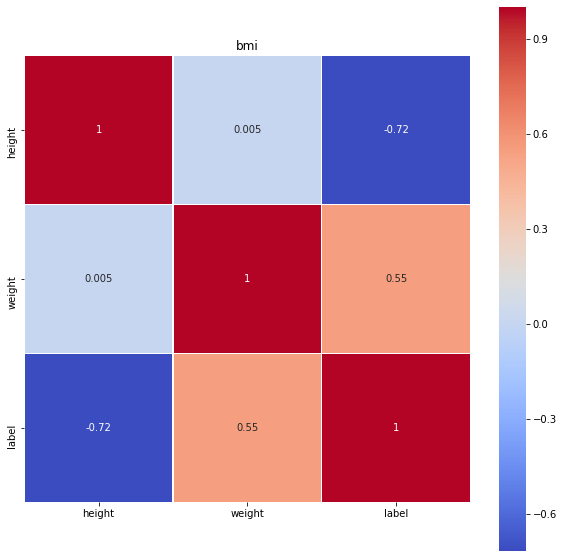

In [7]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(bmi.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.coolwarm, linecolor="white")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('bmi')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


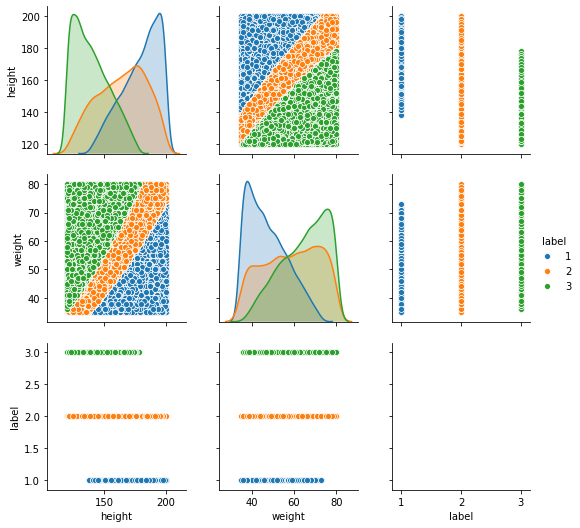

In [8]:
sns.pairplot(bmi, hue='label')

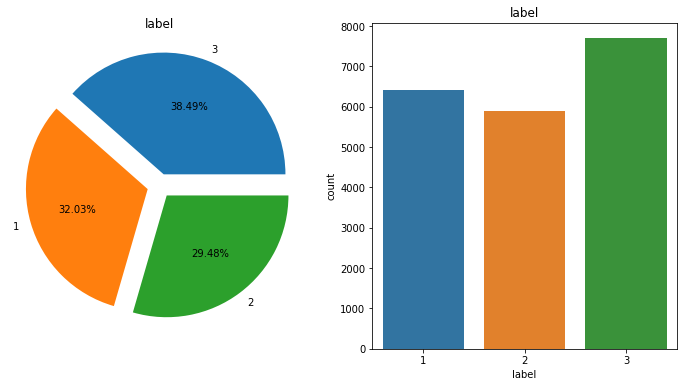

In [9]:
f,ax=plt.subplots(1,2,figsize=(12,6))

bmi['label'].value_counts().plot.pie(explode=[0.1,0.1,0.1],
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('label')
ax[0].set_ylabel('')

sns.countplot('label', data=bmi,ax=ax[1])
ax[1].set_title('label')
plt.show()

In [10]:
y = bmi.loc[:, 'label']

In [11]:
x = bmi.loc[:, ['height','weight']]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, shuffle=True)

In [13]:
clf=SVC()

In [21]:
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = clf.predict(x_test)

In [23]:
print('정답률: ', accuracy_score(y_test, y_pred))

정답률:  0.99925


In [24]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00      1277\n           2       1.00      1.00      1.00      1167\n           3       1.00      1.00      1.00      1556\n\n    accuracy                           1.00      4000\n   macro avg       1.00      1.00      1.00      4000\nweighted avg       1.00      1.00      1.00      4000\n'